In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import missingno as msno
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [72]:
dates = [
            "start_date",
            "end_date"
]

cols_to_drop = ["Year","started_at","ended_at"]

df = pd.read_csv("bicycle_sharing_cleaned.csv",parse_dates=dates).drop(cols_to_drop,axis=1)
df["start_time"] = pd.to_datetime(df["start_time"], format='%H:%M:%S').dt.time
df["end_time"] = pd.to_datetime(df["end_time"], format='%H:%M:%S').dt.time

In [73]:
df.head()

,rideable_type,start_station_name,end_station_name,member_casual,start_date,end_date,start_time,end_time,start_month,end_month
0,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,2020-04-26,17:45:14,18:12:03,April,April
1,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,2020-04-17,17:08:54,17:17:03,April,April
2,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,2020-04-01,17:54:13,18:08:36,April,April
3,docked_bike,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,2020-04-07,12:50:19,13:02:31,April,April
4,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,2020-04-18,10:22:59,11:15:54,April,April


In [74]:
df[["rideable_type","member_casual"]] = df[["rideable_type","member_casual"]].astype("category")

In [75]:
df

,rideable_type,start_station_name,end_station_name,member_casual,start_date,end_date,start_time,end_time,start_month,end_month
0,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,2020-04-26,17:45:14,18:12:03,April,April
1,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,2020-04-17,17:08:54,17:17:03,April,April
2,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,2020-04-01,17:54:13,18:08:36,April,April
3,docked_bike,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,2020-04-07,12:50:19,13:02:31,April,April
4,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,2020-04-18,10:22:59,11:15:54,April,April
...,...,...,...,...,...,...,...,...,...,...
14758108,classic_bike,Clark St & Wrightwood Ave,Sheffield Ave & Waveland Ave,member,2023-02-08,2023-02-08,21:57:22,22:08:06,February,February
14758109,electric_bike,Ogden Ave & Roosevelt Rd,Delano Ct & Roosevelt Rd,member,2023-02-19,2023-02-19,11:29:09,11:39:11,February,February
14758110,electric_bike,Clark St & Wrightwood Ave,Canal St & Madison St,casual,2023-02-07,2023-02-07,09:01:33,09:16:53,February,February
14758111,electric_bike,Clark St & Wrightwood Ave,Canal St & Madison St,casual,2023-02-22,2023-02-22,08:33:22,08:50:11,February,February


In [76]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14758113 entries, 0 to 14758112
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       category      
 1   start_station_name  object        
 2   end_station_name    object        
 3   member_casual       category      
 4   start_date          datetime64[ns]
 5   end_date            datetime64[ns]
 6   start_time          object        
 7   end_time            object        
 8   start_month         object        
 9   end_month           object        
dtypes: category(2), datetime64[ns](2), object(6)
memory usage: 5.4 GB


In [77]:
month_series = df["start_month"].value_counts()

In [78]:
month_series.iloc[[0]]

August    2212645
Name: start_month, dtype: int64

<AxesSubplot:>

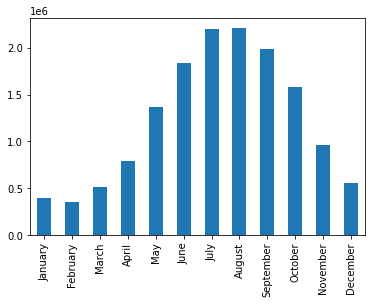

In [79]:
month_series.iloc[[10,11,9,7,5,3,1,0,2,4,6,8]].plot(kind="bar")

<AxesSubplot:>

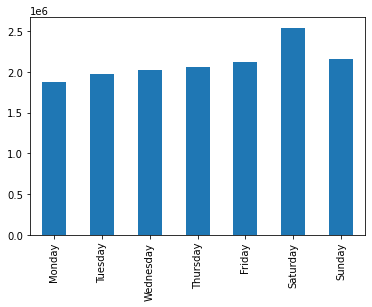

In [80]:
df["start_date"].dt.day_name().value_counts().iloc[[6,5,4,3,2,0,1]].plot(kind="bar")

In [82]:
members = df[df["member_casual"]== "member"]

In [83]:
casual = df[df["member_casual"]== "casual"]

In [88]:
print(len(casual))
print(len(members))

6252131
8505982


In [ ]:
members[""]